In [1]:
library(effects)
library(devtools)
library(easyGgplot2)
library('MASS')

Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.
Loading required package: ggplot2


In [2]:
java_code_smells = read.csv("java_code_smells.csv", header = TRUE)
kotlin_code_smells = read.csv("kotlin_code_smells.csv", header = TRUE)

In [3]:
set.seed(37)
df_java_projects_ran <- java_code_smells[sample(nrow(java_code_smells)),]
df_kotlin_projects_ran <- kotlin_code_smells[sample(nrow(kotlin_code_smells)),]

Dividing data sets into training and test data.

In [4]:
rownames(df_java_projects_ran) <- NULL
rownames(df_kotlin_projects_ran) <- NULL

In [5]:
java_projects_training <- df_java_projects_ran[1:400,]
kotlin_projects_training <- df_kotlin_projects_ran[1:400,]

# Correlation Matrices

## Java

In [6]:
java_projects_training_w_projects <- subset(java_projects_training, select = c(2,3,4,5,6,7,8,9,10,11))
res <- cor(java_projects_training_w_projects)
round(res, 2)

,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
LF,1.00,0.44,0.58,0.56,0.20,0.31,0.61,0.25,0.37,0.12
LPL,0.44,1.00,0.93,0.99,0.27,0.33,0.91,0.76,0.71,0.14
TMM,0.58,0.93,1.00,0.97,0.29,0.45,0.96,0.70,0.73,0.20
Total,0.56,0.99,0.97,1.00,0.28,0.37,0.94,0.74,0.72,0.16
Lifespan,0.20,0.27,0.29,0.28,1.00,0.30,0.28,0.25,0.39,0.17
Issues,0.31,0.33,0.45,0.37,0.30,1.00,0.36,0.16,0.32,0.38
LOC,0.61,0.91,0.96,0.94,0.28,0.36,1.00,0.79,0.77,0.18
Commits,0.25,0.76,0.70,0.74,0.25,0.16,0.79,1.00,0.87,0.12
Contributors,0.37,0.71,0.73,0.72,0.39,0.32,0.77,0.87,1.00,0.30
Stargazers,0.12,0.14,0.20,0.16,0.17,0.38,0.18,0.12,0.30,1.00


## Kotlin

In [7]:
kotlin_projects_training_w_projects <- subset(kotlin_projects_training, select = c(2,3,4,5,6,7,8,9,10,11))
res <- cor(kotlin_projects_training_w_projects)
round(res, 2)

,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
LF,1.00,0.58,0.24,0.65,0.04,0.06,0.47,0.30,0.09,0.03
LPL,0.58,1.00,0.71,0.99,0.14,0.29,0.71,0.52,0.38,0.06
TMM,0.24,0.71,1.00,0.78,0.19,0.40,0.84,0.75,0.45,0.09
Total,0.65,0.99,0.78,1.00,0.15,0.31,0.78,0.60,0.39,0.07
Lifespan,0.04,0.14,0.19,0.15,1.00,0.21,0.17,0.28,0.24,0.22
Issues,0.06,0.29,0.40,0.31,0.21,1.00,0.35,0.41,0.48,0.13
LOC,0.47,0.71,0.84,0.78,0.17,0.35,1.00,0.83,0.51,0.14
Commits,0.30,0.52,0.75,0.60,0.28,0.41,0.83,1.00,0.64,0.25
Contributors,0.09,0.38,0.45,0.39,0.24,0.48,0.51,0.64,1.00,0.42
Stargazers,0.03,0.06,0.09,0.07,0.22,0.13,0.14,0.25,0.42,1.00


## Java and Kotlin

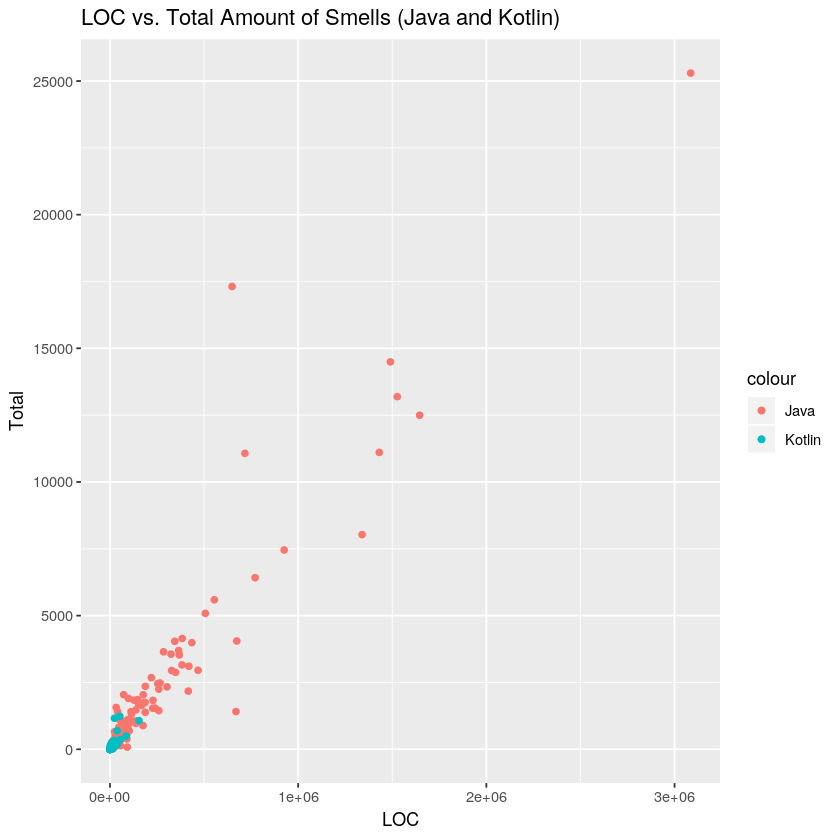

In [8]:
LOC <- java_projects_training$LOC
Total <- java_projects_training$Total

ggplot() +
  geom_point(data=java_projects_training, aes(LOC, Total, color= 'Java')) +
  geom_point(data=kotlin_projects_training, aes(kotlin_projects_training$LOC, kotlin_projects_training$Total, color= 'Kotlin')) + ggtitle("LOC vs. Total Amount of Smells (Java and Kotlin)")

# Multidimensional

## Java

In [9]:
fit <- lm(Total ~ LOC + Stargazers + Contributors + Issues + Lifespan, java_projects_training)

In [10]:
summary(fit)


Call:
lm(formula = Total ~ LOC + Stargazers + Contributors + Issues + 
    Lifespan, data = java_projects_training)

Residuals:
    Min      1Q  Median      3Q     Max 
-4266.8   -90.5   -34.6     5.8 11728.9 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.3852670 93.4249598  -0.036   0.9711    
LOC           0.0084549  0.0002428  34.817   <2e-16 ***
Stargazers   -0.0119242  0.0092200  -1.293   0.1967    
Contributors -0.2191611  0.3213385  -0.682   0.4956    
Issues        0.4270415  0.2076154   2.057   0.0404 *  
Lifespan      0.0520906  0.0557150   0.935   0.3504    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 751.3 on 394 degrees of freedom
Multiple R-squared:  0.8901,	Adjusted R-squared:  0.8887 
F-statistic: 638.2 on 5 and 394 DF,  p-value: < 2.2e-16


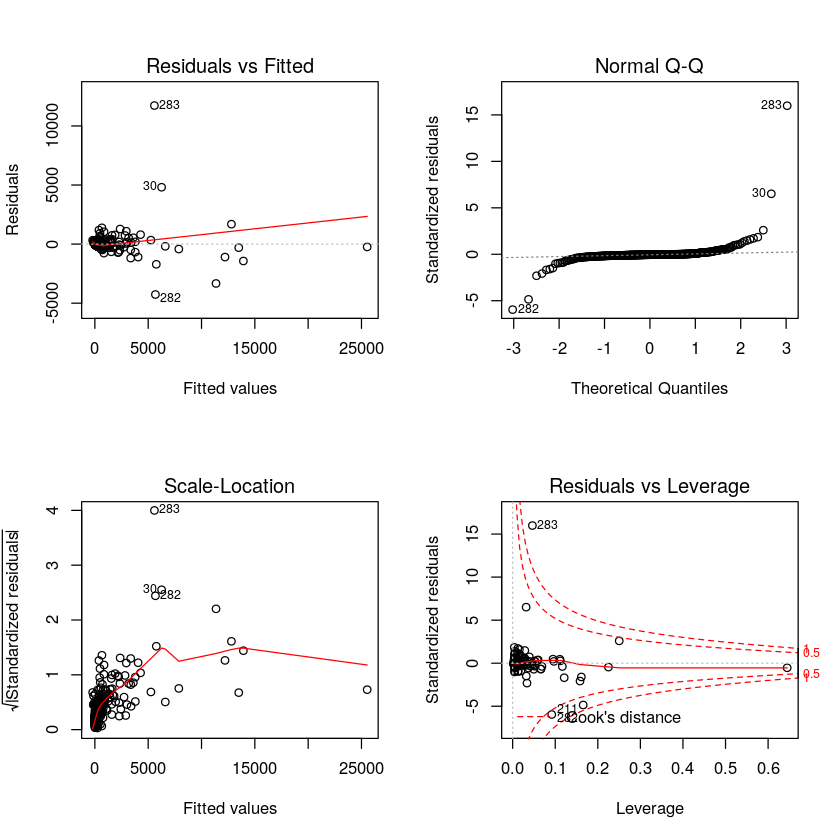

In [11]:
par(mfrow=c(2,2))
plot(fit)

## Kotlin

In [12]:
fit <- lm(Total ~ LOC + Stargazers + Contributors + Issues + Lifespan, kotlin_projects_training)

In [13]:
summary(fit)


Call:
lm(formula = Total ~ LOC + Stargazers + Contributors + Issues + 
    Lifespan, data = kotlin_projects_training)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.51   -9.07   -2.08    1.83  949.09 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.0157268  6.6627738  -0.603    0.547    
LOC           0.0081599  0.0003896  20.944   <2e-16 ***
Stargazers   -0.0029420  0.0021764  -1.352    0.177    
Contributors -0.0529870  0.2664425  -0.199    0.842    
Issues        0.1429416  0.1229828   1.162    0.246    
Lifespan      0.0064224  0.0083153   0.772    0.440    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 72.56 on 394 degrees of freedom
Multiple R-squared:  0.6129,	Adjusted R-squared:  0.608 
F-statistic: 124.8 on 5 and 394 DF,  p-value: < 2.2e-16


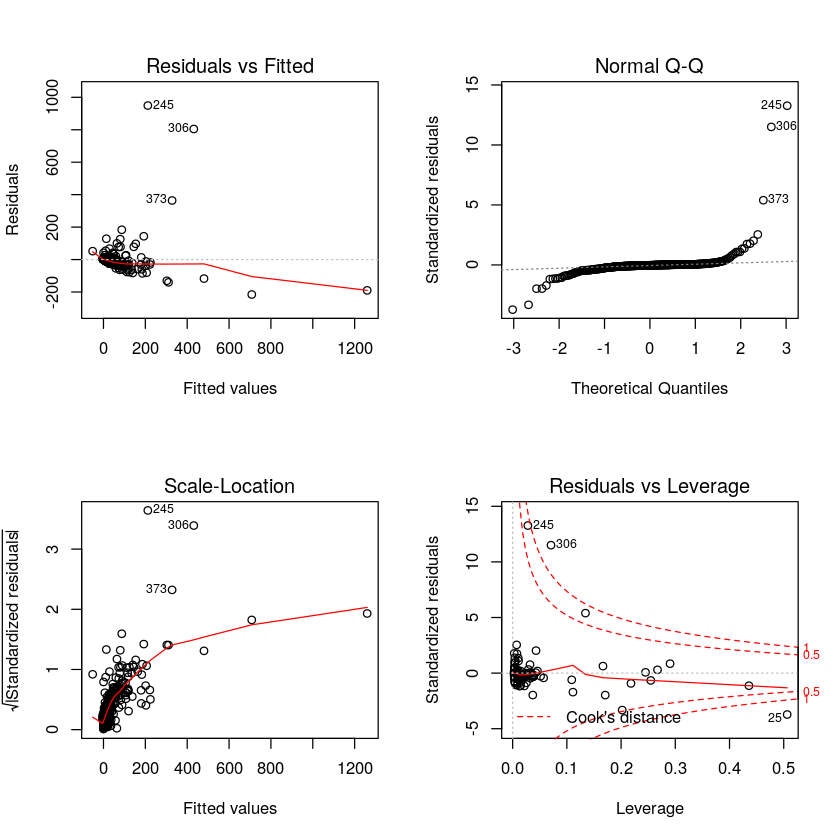

In [14]:
par(mfrow=c(2,2))
plot(fit)

# Box Cox Transformation

## Multidimensional (Java)

In [15]:
java_projects_training <- java_projects_training[java_projects_training$Total != 0, ]
java_projects_training <- java_projects_training[java_projects_training$Lifespan != 0, ]
java_projects_training <- java_projects_training[java_projects_training$Issues != 0, ]
java_projects_training <- java_projects_training[java_projects_training$Contributors != 0, ]
java_projects_training <- java_projects_training[java_projects_training$Stargazers != 0, ]

lambda,lik
0.14141414,-1301.560
0.10101010,-1301.790
0.18181818,-1303.468
0.06060606,-1304.177
0.22222222,-1307.500
0.02020202,-1308.751


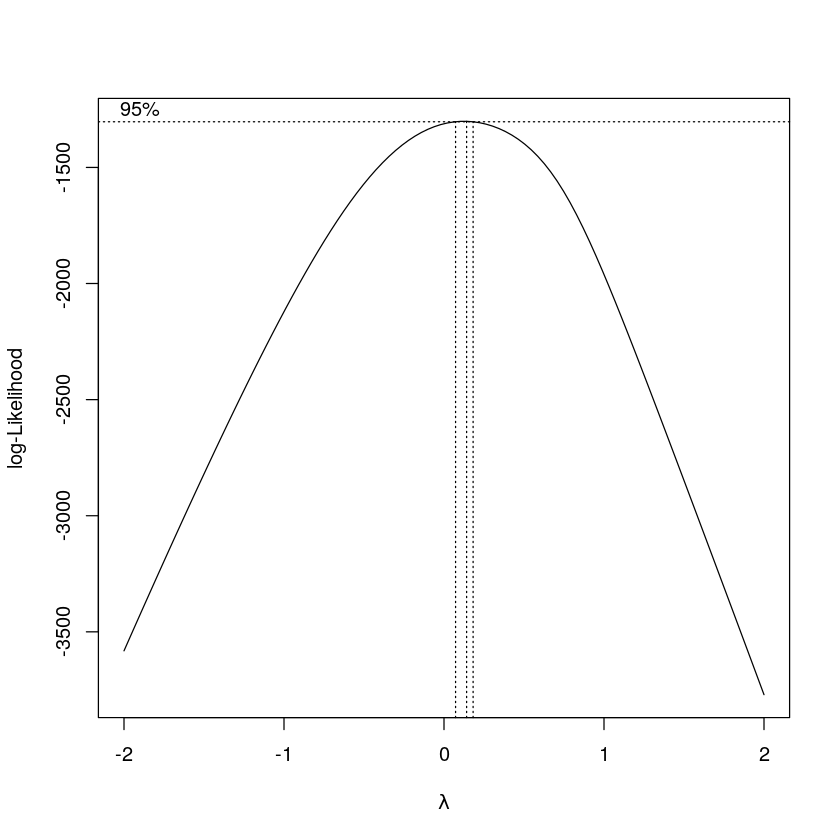

In [16]:
b=boxcox(Total~Lifespan + Issues + LOC + Contributors + Stargazers, data=java_projects_training)
lambda=b$x
lik=b$y
bc=cbind(lambda,lik)
head(bc[order(-lik),])

## Multidimensional (Kotlin)

In [17]:
kotlin_projects_training <- kotlin_projects_training[kotlin_projects_training$Total != 0, ]
kotlin_projects_training <- kotlin_projects_training[kotlin_projects_training$Lifespan != 0, ]
kotlin_projects_training <- kotlin_projects_training[kotlin_projects_training$Issues != 0, ]
kotlin_projects_training <- kotlin_projects_training[kotlin_projects_training$Contributors != 0, ]
kotlin_projects_training <- kotlin_projects_training[kotlin_projects_training$Stargazers != 0, ]

lambda,lik
0.10101010,-857.4145
0.06060606,-857.5357
0.14141414,-858.6224
0.02020202,-858.9026
0.18181818,-861.2650
-0.02020202,-861.4381


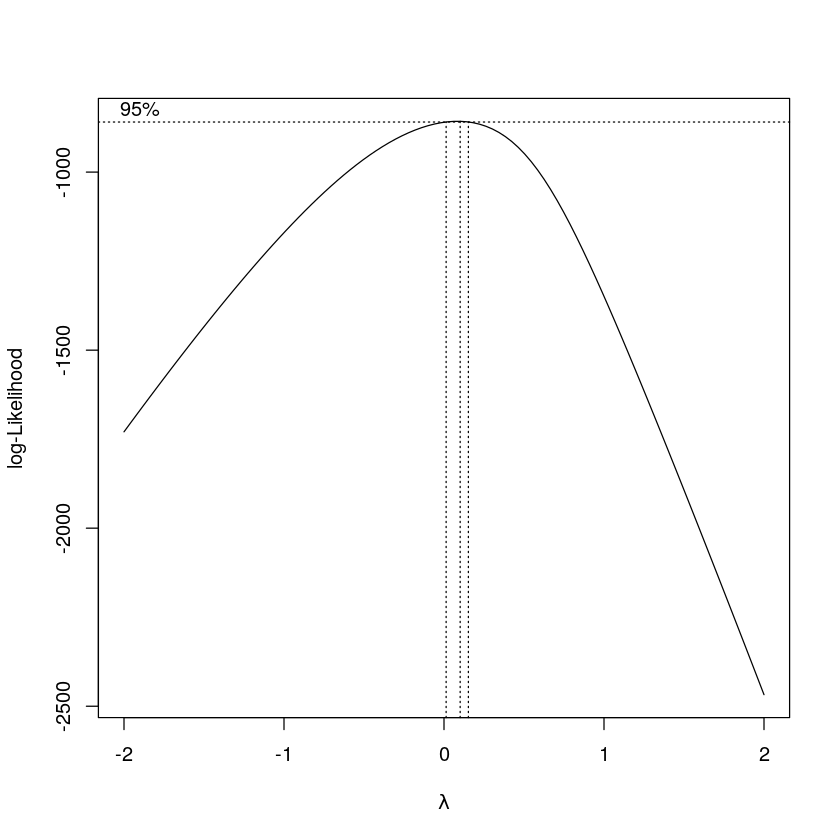

In [18]:
b=boxcox(Total~Lifespan + Issues + LOC + Contributors + Stargazers, data=kotlin_projects_training)
lambda=b$x
lik=b$y
bc=cbind(lambda,lik)
head(bc[order(-lik),])

## Applying the Results of the Box Cox Transformation

## Java

In [19]:
java_projects_training$Total <- log(java_projects_training$Total)

In [20]:
rownames(java_projects_training) <- NULL

In [21]:
Language <- java_projects_training$Language
Lifespan <- java_projects_training$Lifespan
Issues <- java_projects_training$Issues
LOC <- java_projects_training$LOC
Contributors <- java_projects_training$Contributors
Stargazers <- java_projects_training$Stargazers

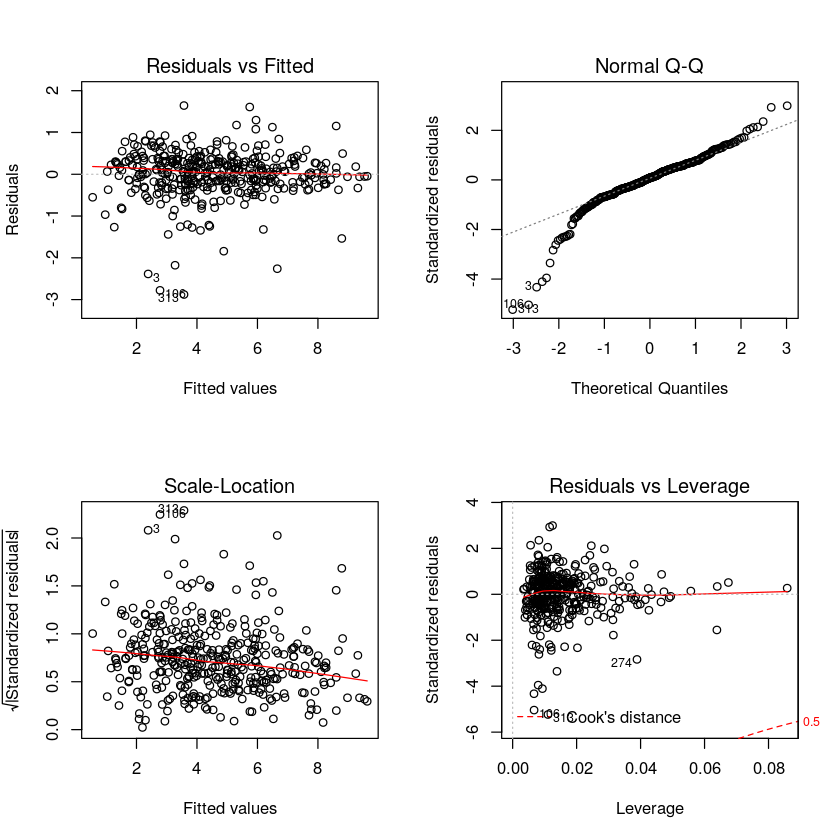

In [22]:
fit <- lm(Total ~ log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data= java_projects_training)
par(mfrow=c(2,2))
plot(fit)

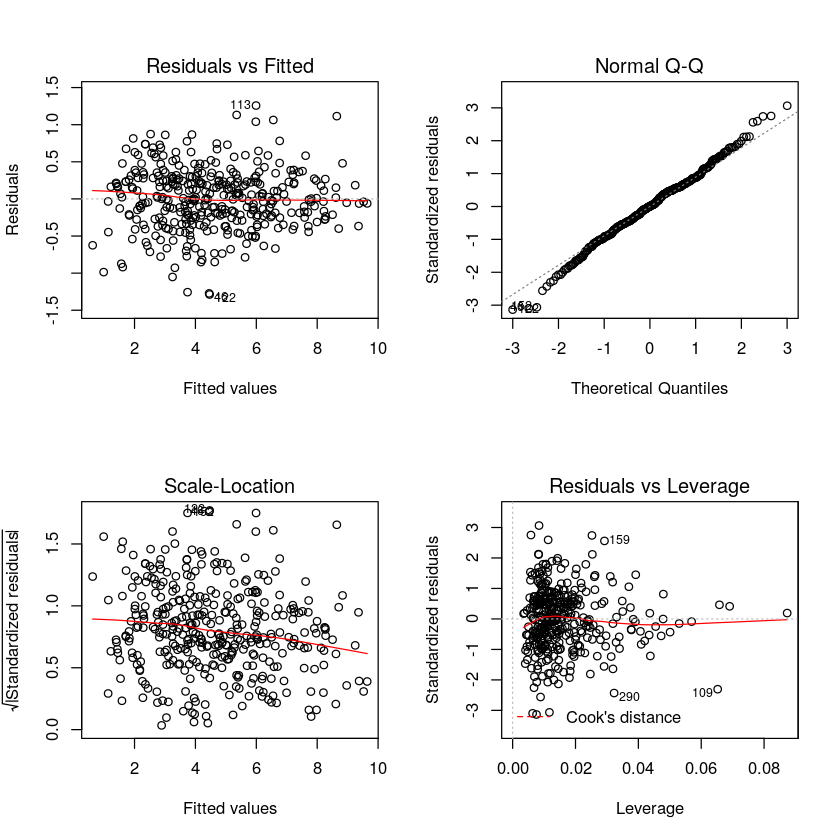

In [23]:
fit <- lm(Total ~ log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data= java_projects_training[-c(106, 347, 293, 48, 248, 313, 3, 145, 86, 243, 274, 114, 81, 16, 234),])
par(mfrow=c(2,2))
plot(fit)

In [24]:
java_projects_training <- java_projects_training[-c(106, 347, 293, 48, 248, 313, 3, 145, 86, 243, 274, 114, 81, 16, 234),]

In [25]:
resid <- resid(fit)
shapiro.test(resid)


	Shapiro-Wilk normality test

data:  resid
W = 0.99461, p-value = 0.2157


## Kotlin

In [26]:
rownames(kotlin_projects_training) <- NULL

In [27]:
kotlin_projects_training$Total <- log(kotlin_projects_training$Total)

In [28]:
Language <- kotlin_projects_training$Language
Lifespan <- kotlin_projects_training$Lifespan
Issues <- kotlin_projects_training$Issues
LOC <- kotlin_projects_training$LOC
Contributors <- kotlin_projects_training$Contributors
Stargazers <- kotlin_projects_training$Stargazers

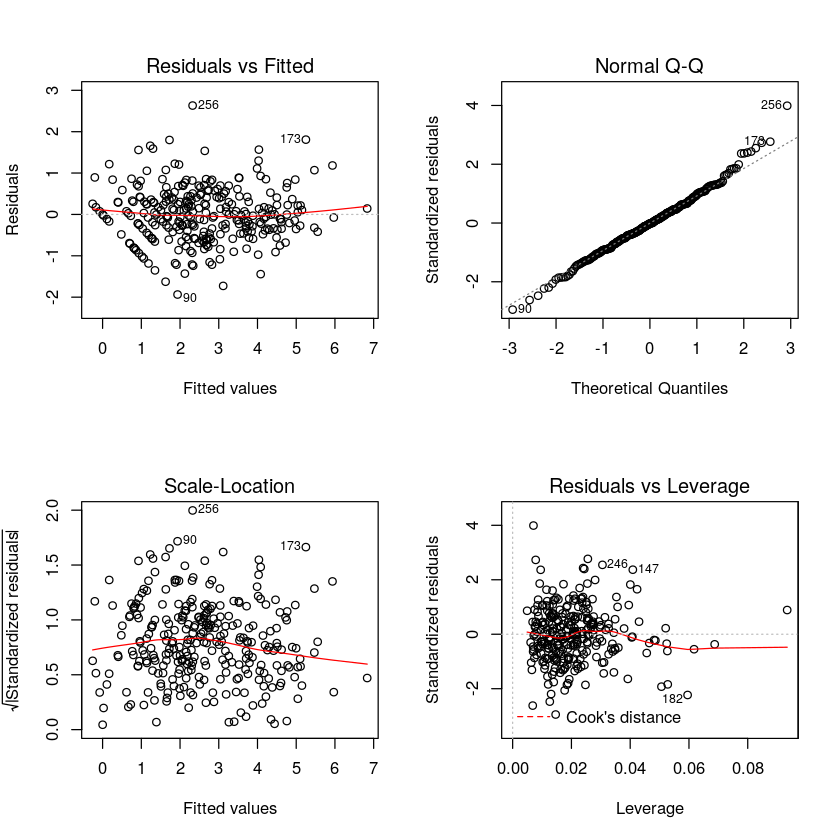

In [29]:
fit <- lm(Total ~ log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data= kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

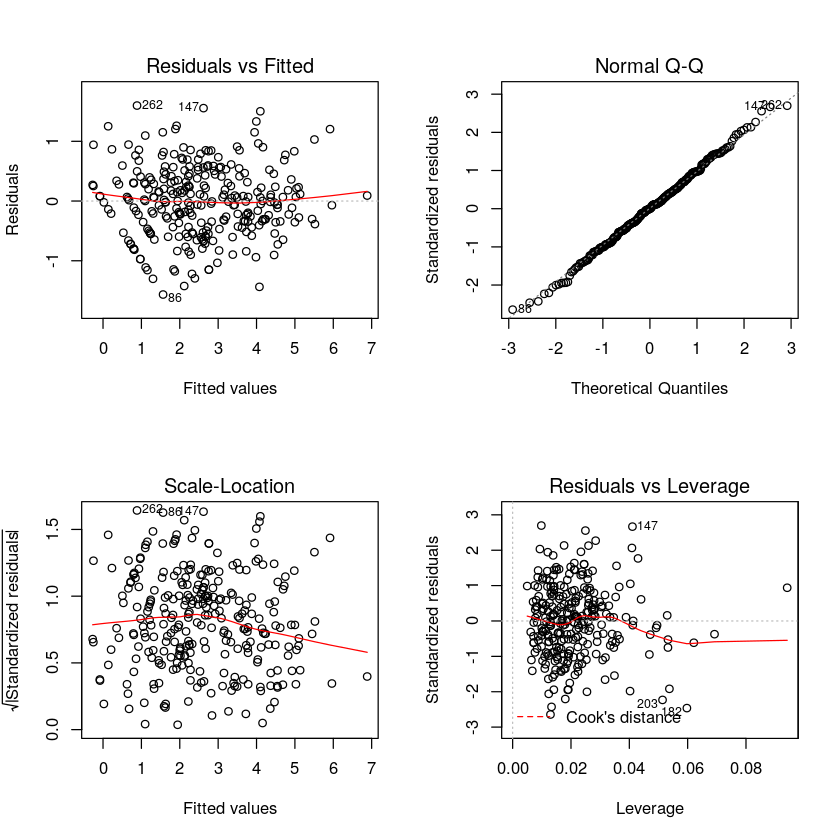

In [30]:
fit <- lm(Total ~ log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data= kotlin_projects_training[-c(256, 133, 173, 90, 181, 246, 1),])
par(mfrow=c(2,2))
plot(fit)

In [31]:
kotlin_projects_training <- kotlin_projects_training[-c(256),]

In [32]:
resid <- resid(fit)
shapiro.test(resid)


	Shapiro-Wilk normality test

data:  resid
W = 0.99753, p-value = 0.9482


# ANCOVA Analysis (Multidimensional)

In [33]:
java_projects_training["Language"] <- 1
kotlin_projects_training["Language"] <- 0
java_kotlin_mul = data.frame(rbind(cbind(java_projects_training$Language, java_projects_training$Total, java_projects_training$Lifespan, java_projects_training$Issues, java_projects_training$LOC, java_projects_training$Contributors, java_projects_training$Stargazers),cbind(kotlin_projects_training$Language, kotlin_projects_training$Total, kotlin_projects_training$Lifespan, kotlin_projects_training$Issues, kotlin_projects_training$LOC, kotlin_projects_training$Contributors, kotlin_projects_training$Stargazers)))
java_kotlin_mul <- setNames(java_kotlin_mul, c("Language","Total", "Lifespan", "Issues","LOC", "Contributors", "Stargazers"))

In [34]:
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$Lifespan != 0, ]
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$Issues != 0, ]
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$LOC != 0, ]
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$Contributors != 0, ]
java_kotlin_mul <- java_kotlin_mul[java_kotlin_mul$Stargazers != 0, ]

In [35]:
java_kotlin_mul[355:375,]

,Language,Total,Lifespan,Issues,LOC,Contributors,Stargazers
355,1,3.583519,1345,224,2756,10,4468
356,1,6.519147,3010,424,67918,90,4497
357,1,5.379897,1063,3,15173,45,2457
358,1,2.708050,2841,53,739,5,3677
359,1,4.488636,1954,21,5065,18,3468
360,1,3.091042,750,11,4389,4,6676
361,1,1.386294,772,6,402,10,2401
362,1,4.510860,981,86,9640,5,5106
363,1,2.197225,1251,50,597,2,3079
364,1,3.526361,1099,69,4311,12,3068


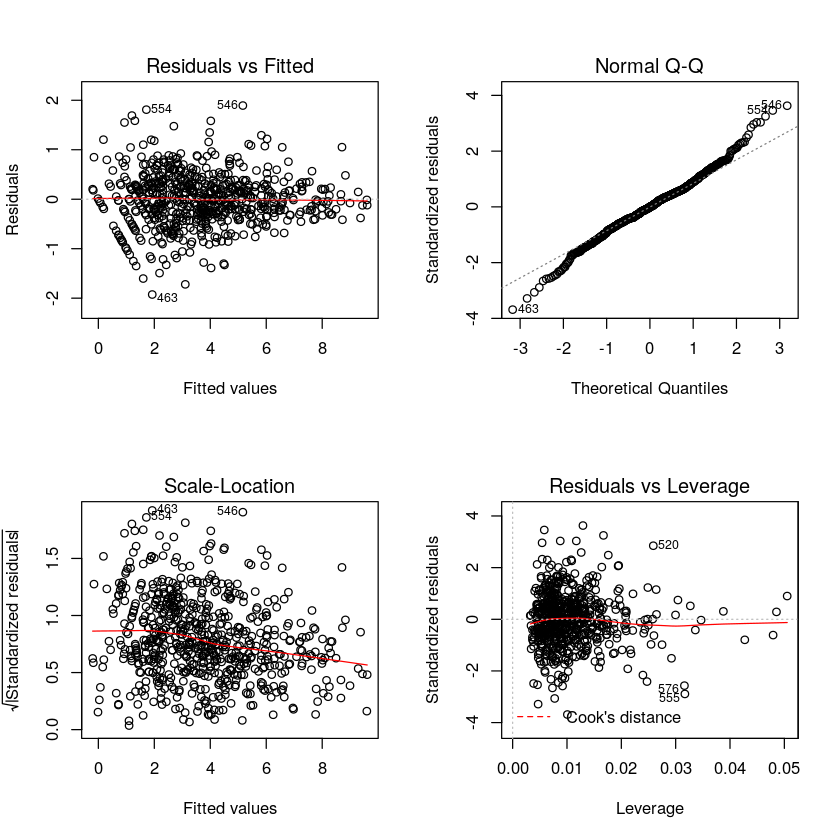

In [36]:
fit <- lm(Total ~ Language + log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data= java_kotlin_mul)
par(mfrow=c(2,2))
plot(fit)

In [37]:
rownames(java_kotlin_mul) <- NULL

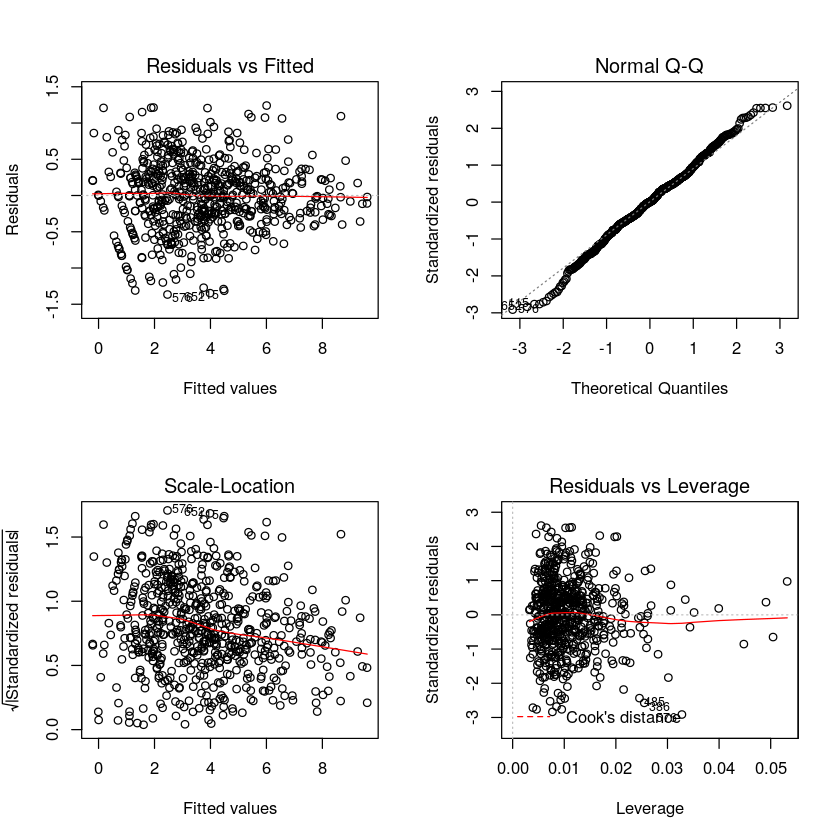

In [38]:
fit <- lm(Total ~ Language + log(Lifespan)+log(Issues) + log(LOC)+log(Contributors) + log(Stargazers), data= java_kotlin_mul[-c(463, 506, 546, 554, 619, 374, 634, 480, 520, 459, 440, 555, 590),])
par(mfrow=c(2,2))
plot(fit)

In [39]:
java_kotlin_mul <-java_kotlin_mul[-c(463, 506, 546, 554, 619, 374, 634, 480, 520, 459, 440, 555, 590),]

In [40]:
java_kotlin_mul$Language <- factor(java_kotlin_mul$Language, label = c("Kotlin", "Java"))

In [41]:
aggregate(java_kotlin_mul$Total, by=list(java_kotlin_mul$Language), FUN=mean)

Group.1,x
Kotlin,2.560392
Java,4.622647


In [42]:
java_kotlin_mul_lang <- java_kotlin_mul$Language

In [43]:
result_of_ancova <- aov(Total ~ java_kotlin_mul_lang + log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data = java_kotlin_mul)
summary(result_of_ancova)

                      Df Sum Sq Mean Sq  F value Pr(>F)    
java_kotlin_mul_lang   1  674.6   674.6 2969.568 <2e-16 ***
log(Lifespan)          1  173.8   173.8  765.073 <2e-16 ***
log(Issues)            1  241.0   241.0 1060.894 <2e-16 ***
log(LOC)               1 1438.3  1438.3 6330.994 <2e-16 ***
log(Contributors)      1    1.3     1.3    5.811 0.0162 *  
log(Stargazers)        1    0.0     0.0    0.179 0.6725    
Residuals            642  145.8     0.2                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Shapiro-Wilk normality test

data:  residuals
W = 0.99566, p-value = 0.06743


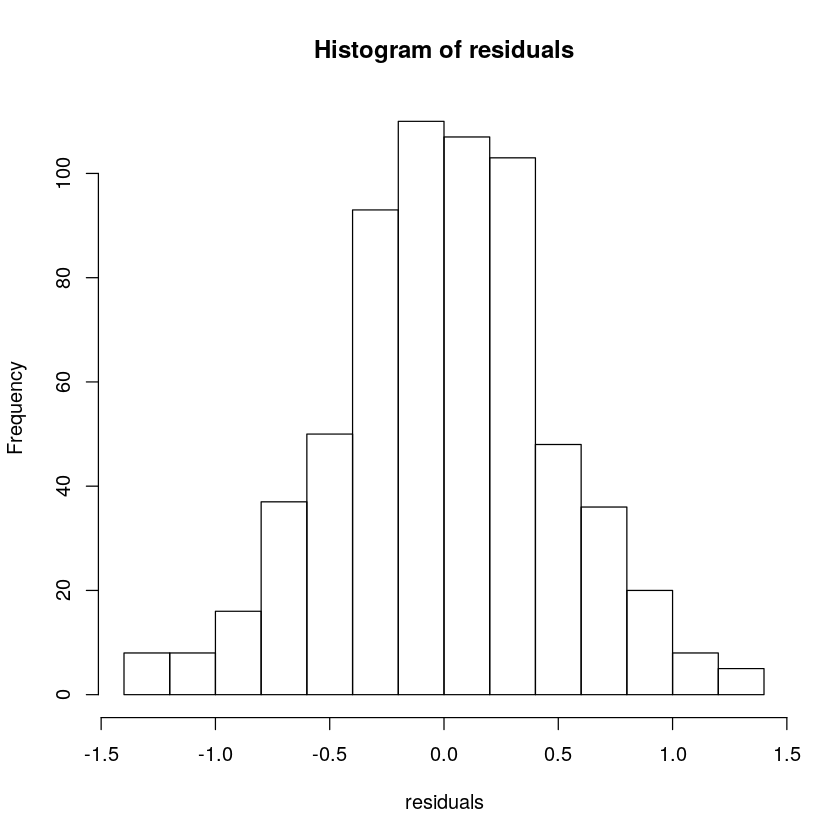

In [44]:
residuals <- resid(result_of_ancova)
shapiro.test(residuals)
hist(residuals)

In [45]:
effect("java_kotlin_mul_lang", result_of_ancova)


 java_kotlin_mul_lang effect
java_kotlin_mul_lang
  Kotlin     Java 
5.643317 5.996391 

# Evaluation

In [46]:
RMSE = function(residuals){
  sqrt(mean((residuals)^2))
}

In [47]:
java_projects_test <- df_java_projects_ran[401:NROW(df_java_projects_ran),]
kotlin_projects_test <- df_kotlin_projects_ran[401:NROW(df_kotlin_projects_ran),]
java_projects_test["Language"] <- 1
kotlin_projects_test["Language"] <- 0
java_kotlin_mul_test = data.frame(rbind(cbind(java_projects_test$Language, java_projects_test$Total, java_projects_test$Lifespan, java_projects_test$Issues, java_projects_test$LOC, java_projects_test$Contributors, java_projects_test$Stargazers),cbind(kotlin_projects_test$Language, kotlin_projects_test$Total, kotlin_projects_test$Lifespan, kotlin_projects_test$Issues, kotlin_projects_test$LOC, kotlin_projects_test$Contributors, kotlin_projects_test$Stargazers)))
java_kotlin_mul_test <- setNames(java_kotlin_mul_test, c("Language","Total", "Lifespan", "Issues","LOC", "Contributors", "Stargazers"))

In [48]:
java_kotlin_mul_test$Total <- log(java_kotlin_mul_test$Total)

In [49]:
java_kotlin_mul_test <- java_kotlin_mul_test[java_kotlin_mul_test$Lifespan != 0, ]
java_kotlin_mul_test <- java_kotlin_mul_test[java_kotlin_mul_test$Issues != 0, ]
java_kotlin_mul_test <- java_kotlin_mul_test[java_kotlin_mul_test$LOC != 0, ]
java_kotlin_mul_test <- java_kotlin_mul_test[java_kotlin_mul_test$Contributors != 0, ]
java_kotlin_mul_test <- java_kotlin_mul_test[java_kotlin_mul_test$Stargazers != 0, ]
java_kotlin_mul_test <- java_kotlin_mul_test[java_kotlin_mul_test$Total != 0, ]
java_kotlin_mul$Language <- factor(java_kotlin_mul$Language, label = c("Kotlin", "Java"))

In [50]:
java_kotlin_mul_test <- java_kotlin_mul_test[Reduce(`&`, lapply(java_kotlin_mul_test, is.finite)),]

In [51]:
rownames(java_kotlin_mul_test) <- NULL
head(java_kotlin_mul_test)

Language,Total,Lifespan,Issues,LOC,Contributors,Stargazers
1,5.4638318,1403,44,22312,59,10491
1,3.1780538,2192,281,1387,36,9966
1,4.9698133,726,30,14082,55,3397
1,4.0073332,1141,27,7120,22,5266
1,0.6931472,667,39,407,52,10214
1,5.5174529,636,100,15768,17,8725


In [52]:
fit <- lm(Total ~ Language + log(Lifespan) + log(Issues) + log(LOC) + log(Contributors) + log(Stargazers), data= java_kotlin_mul_test)
resid <- resid(fit)
round(RMSE(resid),2)

[1] 0.57

In [53]:
round(summary(java_kotlin_mul_test$Total),2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.69    2.40    3.61    3.87    5.17   10.34 